In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_json ('./dank_cleaned.json')
df.columns

Index(['author', 'awards', 'created_utc', 'text_from_image', 'words',
       'processed_words', 'downs', 'id', 'is_nsfw', 'media', 'subreddit',
       'subscribers', 'thumbnail.height', 'thumbnail.thumbnail',
       'thumbnail.width', 'title', 'ups', 'url', 'avg_hue', 'avg_saturation',
       'avg_value', 'avg_redRGB', 'avg_greenRGB', 'avg_blueRGB', 'avg_tan',
       'avg_orange', 'vgg_general', 'vgg_feature_1', 'vgg1_prob',
       'vgg_feature_2', 'vgg2_prob', 'vgg_feature_3', 'vgg3_prob', 'off-white',
       'aqua', 'mustard', 'black', 'purple', 'red-brown', 'dust-brown',
       'gray-blue', 'orange', 'salmon', 'dark-green', 'pink', 'white',
       'yellow-green', 'bright-yellow'],
      dtype='object')

In [101]:
dank_indexes = []
for i in range(0,len(df)):
    if (df.iloc[i]['ups'] > 1000):
        dank_indexes.append(i)
#check
len(dank_indexes)

271

In [102]:
colr_labl = [ 'off-white',
              'aqua',
              'mustard',
              'black',
              'purple',
              'red-brown',
              'dust-brown',
              'gray-blue',
              'orange',
              'salmon',
              'dark-green',
              'pink',
              'white',
              'yellow-green',
              'bright-yellow',
              'avg_tan',
              'avg_orange'
            ]
dank_colr = { 'off-white': [],
              'aqua': [],
              'mustard': [],
              'black': [],
              'purple': [],
              'red-brown': [],
              'dust-brown': [],
              'gray-blue': [],
              'orange': [],
              'salmon': [],
              'dark-green': [],
              'pink': [],
              'white': [],
              'yellow-green': [],
              'bright-yellow': [],
              'avg_tan': [],
              'avg_orange': []
            }
for index in dank_indexes:
    for label in colr_labl:
        dank_colr[label].append(df.iloc[index][label])

In [104]:
dank_avgs = []
for label in colr_labl:
    dank_avgs.append( (sum(dank_colr[label][137:271])+sum(dank_colr[label][0:136])) / len(dank_colr[label]) )
more_from_other_file = [0.02201377168876531, 0.0, 0.0, 1.2927500111782941, 0.0, 0.0, 0.0, 0.6852466922924951, 0.0, 0.011879838155030445, 1.0318146363000185, 0.38893842676016294]
for rec in more_from_other_file:
    dank_avgs.append(rec)
print(dank_avgs)    

[4.58350232413358, 0.040338501176752764, 0.15698305763800738, 15.4778784475487, 0.0, 1.8188493606166056, 1.5855520464549822, 0.5608913631221404, 0.8944757941029522, 1.69655069455904, 0.3823076821789668, 0.0, 0.0, 0.0029681529394833947, 0.17404920442988928, 18.566387259693727, 0.8297874657191878, 0.02201377168876531, 0.0, 0.0, 1.2927500111782941, 0.0, 0.0, 0.0, 0.6852466922924951, 0.0, 0.011879838155030445, 1.0318146363000185, 0.38893842676016294]


In [105]:
rgb_colors = [(250/255,235/255,215/255,1.0),
              (127/255,255/255,212/255,1.0),
              (227/255,207/255,87/255,1.0),
              (0.0,0.0,0.0,1.0),
              (138/255,43/255,226/255,1.0),
              (165/255,42/255,42/255,1.0),
              (139/255,115/255,85/255,1.0),
              (83/255,134/255,139/255,1.0),
              (255/255,97/255,3/255,1.0),
              (255/255,127/255,80/255,1.0),
              (0.0,100/255,0.0,1.0),
              (255/255,20/255,147/255,1.0),
              (238/255,238/255,235/255,1.0),
              (173/255,255/255,47/255,1.0),
              (255/255,255/255,0.0,1.0),
              (206/255,166/255,149/255,1.0),
              (232/255,91/255,31/255,1.0),
              (60/255,179/255,113/255,1.0),
               (30/255,144/255,255/255,1.0),
               (221/255,160/255,221/255,1.0),
               (139/255,69/255,19/255,1.0),
               (199/255,21/255,133/255,1.0),
               (72/255,61/255,139/255,1.0),
               (25/255,25/255,112/255,1.0),
               (95/255,158/255,160/255,1.0),
               (0.0,250/255,154/255,1.0),
               (128/255,128/255,0.0,1.0),
               (255/255,99/255,71/255,1.0),
               (34/255,139/255,34/255,1.0)
             ]

Text(0, 0.5, '% Pixels in Dank Memes (90 Percentile of Upvotes)')

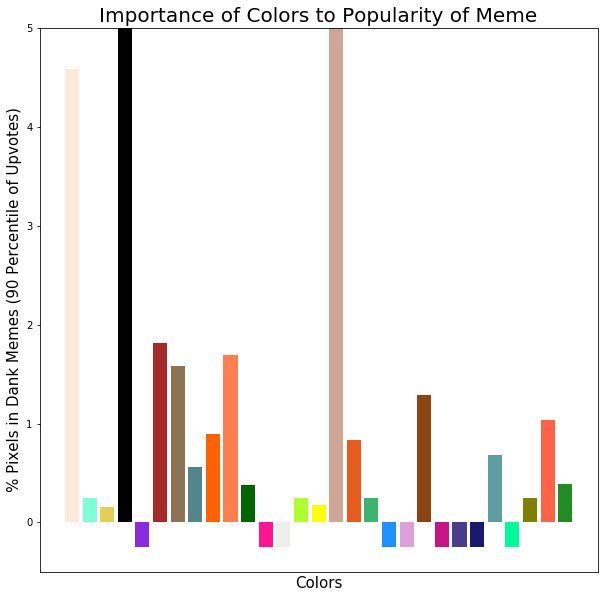

In [106]:
for i in range(0,len(dank_avgs)):
    if dank_avgs[i] == 0:
        dank_avgs[i] = -0.25
    elif dank_avgs[i] <0.15:
        dank_avgs[i] = 0.25

fig,ax = plt.subplots(figsize=[10,10])
plt.bar(np.linspace(1,len(dank_avgs),len(dank_avgs)),dank_avgs, color=rgb_colors)
plt.ylim(top=5,bottom=-0.5) 
_ = plt.setp(ax.get_xticklabels(), visible=False)
ax.tick_params(axis='x', which='both', length=0)
plt.title("Importance of Colors to Popularity of Meme",fontsize=20)
plt.xlabel('Colors',fontsize=15); plt.ylabel('% Pixels in Dank Memes (90 Percentile of Upvotes)',fontsize=15)